   # Bulldozer Price Prediction Model

## Problem Definition

* The aim of this project is to use the appropriate model to predict the future prices of bulldozers using its characteristics and how much they been sold previously.

## Data 

* The data was collected from kaggle bull dozer competition

## Evaluation

* The model will be evaluated using MRSLE(mean root squared log error) as stated as the requirement for the competition.

**note :** The aim is to minimize the evaluation metric as berely minimal as possible.

## features

* The dataset has three parts :
    1. the training set
    2. the validation set 
    3. the test set.

### Import Dependencies

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score


### Load Data

In [2]:
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',parse_dates = ['saledate'],)

C:\Users\user\AppData\Local\Temp\ipykernel_5844\3495076954.py:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',parse_dates = ['saledate'],)


In [3]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(412698, 53)

## Exploratory Data Analysis

carried out both univiarate analysis and bivariate analysis

**univariate analysis**

In [5]:
def unistats(df) :
    output_df = pd.DataFrame(columns = ['counts','unique','missing','dtype','numeric','mode','25%','mean','75%','median','std','skew','kurt'])
    for col in df :
        if col != 'SalesID' :
            if pd.api.types.is_numeric_dtype(df[col]) :
                output_df.loc[col] = [df[col].count(),df[col].nunique(),df[col].isnull().sum(),df[col].dtype,pd.api.types.is_numeric_dtype(df[col]),df[col].mode()[0],
                                      df[col].quantile(0.25),df[col].mean(),df[col].quantile(0.75),df[col].median(),df[col].std(),df[col].skew(),df[col].kurt()]
            else :
                output_df.loc[col] = [df[col].count(),df[col].nunique(),df[col].isnull().sum(),df[col].dtype,pd.api.types.is_numeric_dtype(df[col]),df[col].mode()[0],'','','',
                                      '','','','']
                
            
    return output_df


## test function
unistats(df)

,counts,unique,missing,dtype,numeric,mode,25%,mean,75%,median,std,skew,kurt
SalePrice,412698,954,0,float64,True,25000.0,14500.0,31215.181414,40000.0,24000.0,23141.743695,1.51774,2.158823
MachineID,412698,348808,0,int64,True,2283592.0,1088593.25,1230061.436646,1478079.25,1284397.0,453953.25795,-0.634542,0.909119
ModelID,412698,5281,0,int64,True,4605.0,3261.0,6947.201828,8899.0,4605.0,6280.824982,1.746655,3.04093
datasource,412698,6,0,int64,True,132.0,132.0,135.169361,136.0,132.0,9.646749,2.438125,6.856407
auctioneerID,392562,30,20136,float64,True,1.0,1.0,6.585268,4.0,2.0,17.158409,4.808828,22.855449
YearMade,412698,73,0,int64,True,1000.0,1985.0,1899.049637,2001.0,1995.0,292.190243,-2.748598,5.56609
MachineHoursCurrentMeter,147504,15633,265194,float64,True,0.0,0.0,3522.988285,3209.0,0.0,27169.92865,37.171588,1964.194505
UsageBand,73670,3,339028,object,False,Medium,,,,,,,
saledate,412698,4013,0,datetime64[ns],False,2009-02-16 00:00:00,,,,,,,
fiModelDesc,412698,5059,0,object,False,310G,,,,,,,


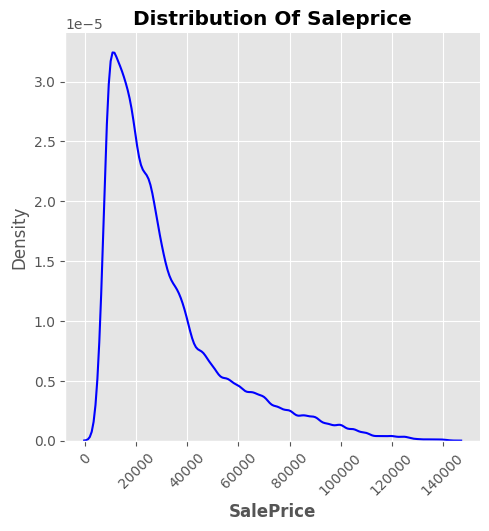

In [6]:
# distribution of saleprice
plt.style.use('ggplot')
fig,ax = figsize = (10,10)
sns.displot(df['SalePrice'],color = 'blue',kind='kde');
plt.title('Distribution Of Saleprice',fontweight = 'bold')
plt.xlabel('SalePrice',fontweight = 'bold')
plt.xticks(rotation = 45);

#### Bivariate Analysis

## Feature Engineering

In [7]:
#sort dataframe by saledate
df.sort_values(by = ['saledate'],ascending = True,inplace = True)

#copy dataframe
copied_df = df.copy()

In [8]:
#enriching saledate
copied_df['saleyear'] = copied_df.saledate.dt.year
copied_df['salemonth'] = copied_df.saledate.dt.month
copied_df['saleday'] = copied_df.saledate.dt.day
copied_df['saledayofweek'] = copied_df.saledate.dt.dayofweek
copied_df['saledayofyear'] = copied_df.saledate.dt.dayofyear
copied_df.drop('saledate',axis = 1,inplace = True)

In [9]:
# converting strings to categories
for label,content in copied_df.items() :
    if pd.api.types.is_string_dtype(content):
        copied_df[label] = content.astype('category').cat.as_ordered()

In [10]:
copied_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

## handling missing values

**numeric values**

In [11]:
for label,content in copied_df.items() :
    if pd.api.types.is_numeric_dtype(content) :
        if pd.isnull(content).sum() :
            copied_df[label + 'is_missing'] = pd.isnull(content)
            copied_df[label] = content.fillna(content.mean())

**categorical missing values**

In [12]:
for label,content in copied_df.items() :
    if not pd.api.types.is_numeric_dtype(content) :
            copied_df[label + 'is_missing'] = pd.isnull(content)
            copied_df[label] = pd.Categorical(content).codes + 1

In [13]:
copied_df.isnull().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

In [14]:
copied_df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,3522.988285,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,3522.988285,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,3522.988285,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,3522.988285,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,3522.988285,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,3522.988285,0,2101,...,True,True,True,True,True,False,False,False,True,True
412476,6324811,6000.0,1919104,19330,149,99.0,2004,3522.988285,0,240,...,True,True,True,True,True,True,True,True,True,True
411927,6313029,16000.0,1918416,17244,149,99.0,2004,3522.988285,0,627,...,True,True,True,True,True,True,True,True,True,True
407124,6266251,55000.0,509560,3357,149,99.0,1993,3522.988285,0,83,...,True,True,True,True,True,True,True,True,True,True


In [15]:
copied_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(5), int64(10), int8(39)
memory usage: 81.5 MB


In [16]:
# splitting data into training and validation set
df_val = copied_df[copied_df['saleyear'] == 2012]
df_train = copied_df[copied_df['saleyear'] != 2012]

len(df_val),len(df_train)

(11573, 401125)

In [17]:
# split into x_train,x_valid,y_train,y_valid
x_train,y_train = df_train.drop('SalePrice',axis = 1),df_train['SalePrice']
x_valid,y_valid = df_val.drop('SalePrice',axis=1),df_val['SalePrice']

In [18]:
x_train.shape,y_train.shape,x_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Evaluation metrics¶
we using RMSLE is the base metrics to judge the models,since it is the requirement for the model

In [33]:
# function to calculate rmsle
def rmsle(y_test,y_preds) :
    '''
    calculate the root mean squared log error
    '''
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# funtion to evaluate the model on the rsmle,MAE,r2_score
def score(model) :
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    score = {
        
        'training MAE' : mean_absolute_error(y_train,train_preds),
        'valid MAE' : mean_absolute_error(y_valid,val_preds),
        'training RMSLE' : rmsle(y_train,train_preds),
        'valid RMSLE' : rmsle(y_valid,val_preds),
        'training r^2' : r2_score(y_train,train_preds),
        'valid r^2' : r2_score(y_valid,val_preds)
            
        }
    return score

## Testing model on a subset

In [26]:
model = RandomForestRegressor(n_jobs = -1,
                             random_state = 42,
                             max_samples = 10000)

In [27]:
%%time
model.fit(x_train,y_train)

CPU times: total: 46.4 s
Wall time: 13.1 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [35]:
# Evaluate model
score(model)

{'training MAE': 5564.862616815209,
 'valid MAE': 7176.6932739998265,
 'training RMSLE': 0.25786027308497367,
 'valid RMSLE': 0.2928456593997681,
 'training r^2': 0.8605382965540621,
 'valid r^2': 0.831616423097438}

## hyperparameter tuning with randomizedsearchcv

In [42]:
%%time

#parameter grid
rf_grid = {
    'n_estimators' : np.arange(10,100,10),
    'max_depth' : [None,3,5,10],
    'min_samples_split' : np.arange(2,20,2),
    'min_samples_leaf' : np.arange(1,20,2),
    'max_features' : [0.5,1,'sqrt','auto'],
    'max_samples' : [10000]
}

#instantiate randomizedsearchcv model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,random_state = 42),
                             param_distributions = rf_grid,
                             n_iter = 100,
                             cv = 5,
                             verbose = True)
#fit model
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

CPU times: total: 10min 47s
Wall time: 28min 29s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [43]:
# best model hyperparameter
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [44]:
score(rs_model)

{'training MAE': 5678.575842443129,
 'valid MAE': 7344.971551599989,
 'training RMSLE': 0.2618971578134925,
 'valid RMSLE': 0.29924454232154585,
 'training r^2': 0.8548074852146516,
 'valid r^2': 0.8242254705664698}

#### MAKING PREDICTION ON TEST DATA

In [56]:
# import test data
test_df = pd.read_csv('data/bluebook-for-bulldozers/Test.csv',low_memory = False,
                     parse_dates = ['saledate'])

test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


#### proprecessing test dataset in the same format as training set

In [57]:
def preprocessing(df):
    df['saleyear'] = df.saledate.dt.year
    df['salemonth'] = df.saledate.dt.month
    df['saleday'] = df.saledate.dt.day
    df['saledayofweek'] = df.saledate.dt.dayofweek
    df['saledayofyear'] = df.saledate.dt.dayofyear
    df.drop('saledate',axis = 1,inplace = True)
    
    
    #fill numerical features
    for label,content in df.items() :
        if pd.api.types.is_numeric_dtype(content) :
            if pd.isnull(content).sum() :
                df[label + 'is_missing'] = pd.isnull(content)
                df[label] = content.fillna(content.mean())
                
    # fill categorical data
    for label,content in df.items() :
        if not pd.api.types.is_numeric_dtype(content) :
            df[label + 'is_missing'] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
            
    return df

In [58]:
test_df = preprocessing(test_df)
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [60]:
#missing columns in test-df
set(x_train.columns) - set(test_df.columns)

{'auctioneerIDis_missing'}

In [61]:
#manually adjusting df_test to have auctioneeringID
test_df['auctioneerIDis_missing'] = False
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0000,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0000,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0000,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0000,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0000,2,566,196,...,True,True,True,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,19846.7783,0,713,235,...,False,False,False,False,True,True,True,True,True,False
12453,6643173,2558332,21434,149,2,2005,19846.7783,0,186,80,...,False,False,False,False,True,True,True,True,True,False
12454,6643184,2558342,21437,149,2,1000,19846.7783,0,325,123,...,False,False,False,False,True,True,True,True,True,False
12455,6643186,2558343,21437,149,2,2006,19846.7783,0,325,123,...,False,False,False,False,True,True,True,True,True,False


making prediction since rest_df has the same number of features with train data

In [63]:
test_preds = rs_model.predict(test_df)

C:\Users\user\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [64]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = test_df['SalesID']
df_preds['SalePrice'] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,20425.000000
1,1227844,26783.333333
2,1227847,57000.000000
3,1227848,83783.333333
4,1227863,32183.333333
...,...,...
12452,6643171,45316.666667
12453,6643173,13258.333333
12454,6643184,13525.000000
12455,6643186,14900.000000


In [65]:
df_preds.to_csv('test_prediction.csv',index = False)